<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page


Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text


Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data, 'html5lib')

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
import pandas as pd

table = soup.find('table')
df = pd.read_html(str(table), flavor='bs4')[0]
headers = df.iloc[0]
df = pd.DataFrame(df.values[1:], columns=headers)
df.head()

,No.,Language,Created By,Average Annual Salary,Learning Difficulty
0,1,Python,Guido van Rossum,"$114,383",Easy
1,2,Java,James Gosling,"$101,013",Easy
2,3,R,"Robert Gentleman, Ross Ihaka","$92,037",Hard
3,4,Javascript,Netscape,"$110,981",Easy
4,5,Swift,Apple,"$130,801",Easy


In [ ]:
df.info()

In [6]:
df["Average_Salary"] = df["Average Annual Salary"].str.replace('$','',regex=True).str.replace(',','').astype(float)
#df["Average_Salary"] = pd.to_numeric(df["Average_Salary"], inplace= True)

#df2.head()
df.drop(columns=["Average Annual Salary"],inplace=True)
df_1 = df.sort_values(by=["Average_Salary"],ascending=False)
df_1

,No.,Language,Created By,Learning Difficulty,Average_Salary
4,5,Swift,Apple,Easy,130801.0
0,1,Python,Guido van Rossum,Easy,114383.0
5,6,C++,Bjarne Stroustrup,Hard,113865.0
3,4,Javascript,Netscape,Easy,110981.0
1,2,Java,James Gosling,Easy,101013.0
9,10,Go,"Robert Griesemer, Ken Thompson, Rob Pike.",Difficult,94082.0
2,3,R,"Robert Gentleman, Ross Ihaka",Hard,92037.0
6,7,C#,Microsoft,Hard,88726.0
8,9,SQL,"Donald D. Chamberlin, Raymond F. Boyce.",Easy,84793.0
7,8,PHP,Rasmus Lerdorf,Easy,84727.0


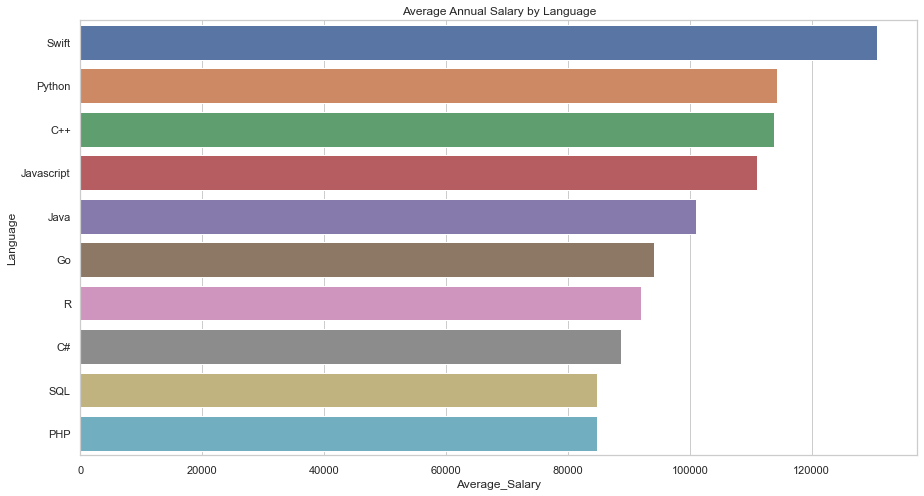

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='whitegrid')
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x="Average_Salary", y='Language', data=df_1)
plt.title('Average Annual Salary by Language')
plt.show()

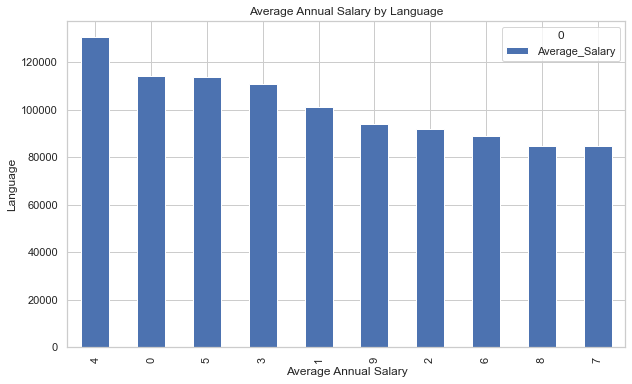

In [13]:
df_1.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Average Annual Salary') # add to x-label to the plot
plt.ylabel('Language') # add y-label to the plot
plt.title('Average Annual Salary by Language') # add title to the plot

plt.show()


Save the scrapped data into a file named *popular-languages.csv*


In [11]:
# your code goes here
df.to_csv('popular-Languages.csv')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
